# CSC494 - Final Project
## American Sign Language Recognizer

# Dataset

In [47]:
import os
import numpy as np
dataset_dir = f'{os.getcwd()}/../dataset'
path_to_training = f'{dataset_dir}/asl_alphabet_train/asl_alphabet_train/'
path_to_testing = f'{dataset_dir}/asl_alphabet_test/asl_alphabet_test/' # Lets use this for blind testing (i.e. the images were not used to validate during the training process)

f'[Path to training exists >> {os.path.exists(path_to_training)}]' \
f'[Path to testing exists >> {os.path.exists(path_to_testing)}]'

'[Path to training exists >> True][Path to testing exists >> True]'

In [48]:
categories = [f.name for f in os.scandir(path_to_training)]
categories

['A',
 'B',
 'C',
 'D',
 'del',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'nothing',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'space',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.


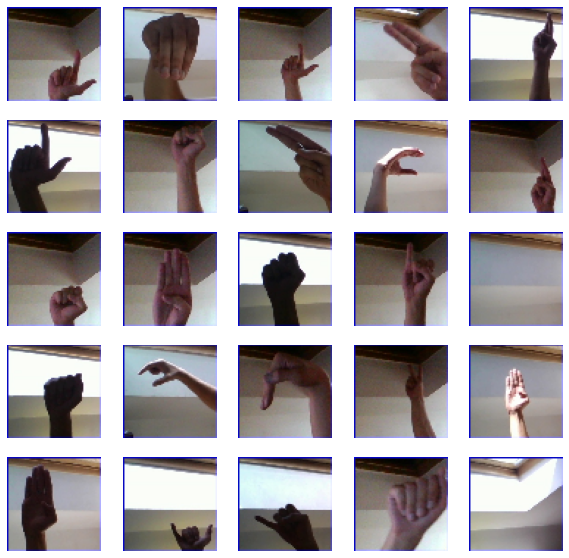

In [49]:
from image_cnn import ASLClassifier
asl_clf = ASLClassifier()
asl_clf.load_dataset(path_to_training, img_shape=(64, 64, 3))
asl_clf.display_25_img()

In [50]:
asl_clf.compile_model()

In [51]:
asl_clf.model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 16)        1216      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 32, 32, 16)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        12832     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 16, 16, 32)       

In [52]:
print(asl_clf.train_set)
print(asl_clf.test_set)

In [53]:
asl_history = asl_clf.train(epochs=10)

Epoch 1/10
1904/1904 [==============================] - 158s 83ms/step - loss: 1.3077 - accuracy: 0.5992 - val_loss: 1.1928 - val_accuracy: 0.6549
Epoch 2/10
1904/1904 [==============================] - 152s 80ms/step - loss: 0.2989 - accuracy: 0.8986 - val_loss: 0.9787 - val_accuracy: 0.7351
Epoch 3/10
1904/1904 [==============================] - 139s 73ms/step - loss: 0.2012 - accuracy: 0.9338 - val_loss: 1.2042 - val_accuracy: 0.6845
Epoch 4/10
1904/1904 [==============================] - 142s 74ms/step - loss: 0.1547 - accuracy: 0.9470 - val_loss: 0.8284 - val_accuracy: 0.7812
Epoch 5/10
1904/1904 [==============================] - 139s 73ms/step - loss: 0.1379 - accuracy: 0.9542 - val_loss: 1.5562 - val_accuracy: 0.6770
Epoch 6/10
1904/1904 [==============================] - 142s 74ms/step - loss: 0.1273 - accuracy: 0.9587 - val_loss: 1.1447 - val_accuracy: 0.7266
Epoch 7/10
1904/1904 [==============================] - 141s 74ms/step - loss: 0.1162 - accuracy: 0.9623 - val_loss: 0

In [54]:
prediction = asl_clf.model.predict(asl_clf.test_set)

In [55]:
prediction

array([[1.0000000e+00, 8.8637338e-05, 6.8041384e-03, ..., 1.0220718e-07,
        6.2590517e-14, 1.6241355e-06],
       [1.0000000e+00, 2.4077828e-05, 6.8770349e-03, ..., 3.7953010e-10,
        2.2429858e-15, 2.4148825e-08],
       [1.0000000e+00, 2.5188146e-07, 9.9798336e-10, ..., 1.5841381e-16,
        4.3861558e-14, 8.8309617e-09],
       ...,
       [6.9858863e-05, 3.2173926e-08, 5.3638560e-05, ..., 1.9949704e-02,
        2.0665318e-01, 9.8343176e-01],
       [1.5318394e-04, 1.6796685e-08, 2.4944544e-04, ..., 2.7799070e-01,
        1.9704610e-02, 9.9943769e-01],
       [5.7552577e-05, 2.7489060e-09, 6.8544068e-05, ..., 7.3416859e-02,
        5.5503100e-02, 9.9907756e-01]], dtype=float32)

In [56]:
asl_clf.test_set.classes

array([ 0,  0,  0, ..., 28, 28, 28])

In [57]:
pred_classes = []

In [58]:
asl_pred = np.argmax(prediction, axis=1)
asl_pred

array([ 0,  0,  0, ..., 28, 28, 28], dtype=int64)

Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       850
           1       0.73      0.93      0.82       709
           2       0.99      0.99      0.99       901
           3       0.88      0.99      0.94       800
           4       0.89      0.70      0.78      1139
           5       0.89      1.00      0.94       804
           6       0.86      0.73      0.79      1050
           7       0.69      0.83      0.75       751
           8       0.64      0.96      0.77       603
           9       0.83      0.81      0.82       923
          10       0.91      0.98      0.95       837
          11       0.86      0.98      0.92       790
          12       0.32      0.60      0.42       474
          13       0.34      0.54      0.42       556
          14       0.64      0.63      0.64       912
          15       0.91      0.79      0.85      1028
          16       0.82      0.82      0.82       891
  

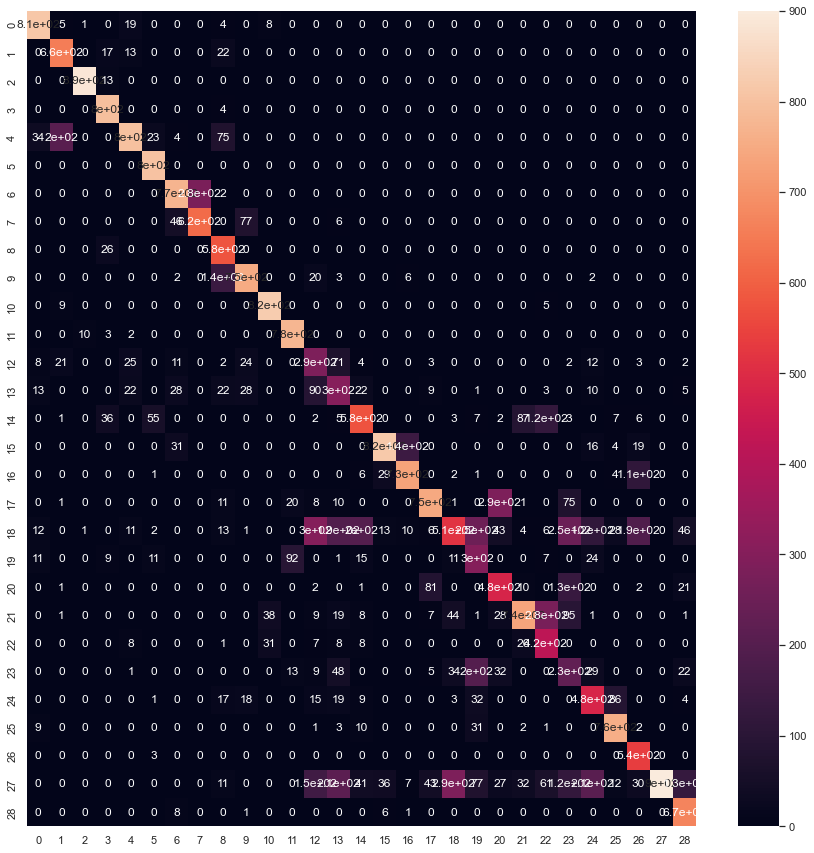

In [59]:
asl_clf.performance_report(asl_pred)

In [61]:
asl_clf.model.save('asl_clf_64x64_10e.h5')